In [54]:
import json
import os
# called in abstraction_glyph.py
import json
import os
import hdbscan
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np



In [55]:
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    return closest_index

def getPositions(crDataPosition):
    x_list = crDataPosition[::2] 
    y_list = crDataPosition[1::2]
    positions = []
    for index,value in enumerate(x_list):
        positions.append((x_list[index],y_list[index]))
    return positions

def centroid(*points):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    _len = len(points)
    centroid_x = sum(x_coords)/_len
    centroid_y = sum(y_coords)/_len
    return [centroid_x, centroid_y]

Total Points for players:  44500


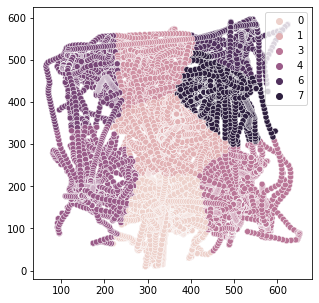

In [56]:
#Getting Zones and Clusters
all_points = []
for log_file in os.listdir(f'../DATA/Logs/'):
    if log_file !='.DS_Store':
        with open(f'../DATA/Logs/{log_file}', "r") as data:
            data = json.load(data)
            for actor in data['crData']['actors']:
                if actor['type'] == 'Player':
                    #print(f'In {log_file} Found actor {actor["id"]} Positions: ', len(getPositions(actor['positions'])))
                    positions = getPositions(actor['positions'])
                    all_points += positions


print('Total Points for players: ', len(all_points))

x, y = zip(*all_points)

# The random_state needs to be the same number to get reproducible results
kmeans = KMeans(n_clusters=8, random_state=42) 
kmeans.fit(all_points)
plt.figure(figsize=(5, 5))
sns.scatterplot(x = x, y = y, hue=kmeans.labels_)
cluster_centroids = [list(i) for i in kmeans.cluster_centers_]


In [57]:
#frame wise screenshots

player_wise_per_log = {}
positions_per_frame_per_log = {} #What are the absolute positions of each of the ten players per each frame, key-> frame number, value-> list of positons for each of the ten players
centroids_per_frame_per_log = {} #What is the centroid of absolute player poistions of the ten players per each frame, key-> frame number, value->centroid of the ten players
zone_per_frame_per_log     = {} #What cluster/zone does the centroid belong to
players_per_frame_per_zone_per_log = {} #What is the frequency of players in each of the cluster/zones 


for log_file in os.listdir('../DATA/Logs/'):
    if log_file!=".DS_Store":
        print(f'======= New Log File {log_file} =====')
        log_file_name = log_file
        
        player_wise_points = {}
        positions_per_frame = {} #What are the absolute positions of each of the ten players per each frame, key-> frame number, value-> list of positons for each of the ten players
        centroids_per_frame = {} #What is the centroid of absolute player poistions of the ten players per each frame, key-> frame number, value->centroid of the ten players
        zone_per_frame      = {} #What cluster/zone does the centroid belong to
        players_per_frame_per_zone = {} #What is the frequency of players in each of the cluster/zones 

        with open(f'../DATA/Logs/{log_file_name}', "r") as data:

            data = json.load(data)
            
            for actor in data['crData']['actors']:
                if actor['type'] == 'Player':
                    print(f'Found actor {actor["id"]} Positions: ', len(getPositions(actor['positions'])))
                    positions = getPositions(actor['positions'])
                    player_wise_points[str(actor['id'])]=positions




        for index, value in enumerate(player_wise_points[list(player_wise_points)[0]]):
            positions_per_frame[str(index)] = [player_wise_points[actor_index][index] for actor_index in list(player_wise_points.keys()) ]
            centroid_per_frame = list(np.mean(tuple(positions_per_frame[str(index)]), axis=0))
            centroids_per_frame[str(index)] = centroid_per_frame

            #find closest centroid per frame.
            zone_per_frame[str(index)] = closest_node(centroid_per_frame,cluster_centroids)



        for frame in positions_per_frame:
            players_in_which_zones = [closest_node(player_position,cluster_centroids) for player_position in positions_per_frame[frame]]
            players_per_frame_per_zone[frame] = {x:players_in_which_zones.count(x) for x in players_in_which_zones}


        player_wise_per_log[log_file] = player_wise_points
        positions_per_frame_per_log[log_file] = positions_per_frame
        centroids_per_frame_per_log[log_file] = centroids_per_frame
        zone_per_frame_per_log[log_file]      = zone_per_frame
        players_per_frame_per_zone_per_log[log_file]=players_per_frame_per_zone


======= New Log File log copy.json =====
Found actor 3 Positions:  2225
Found actor 4 Positions:  2225
Found actor 6 Positions:  2225
Found actor 14 Positions:  2225
Found actor 62 Positions:  2225
Found actor 5 Positions:  2225
Found actor 9 Positions:  2225
Found actor 11 Positions:  2225
Found actor 12 Positions:  2225
Found actor 73 Positions:  2225
======= New Log File log.json =====
Found actor 3 Positions:  2225
Found actor 4 Positions:  2225
Found actor 6 Positions:  2225
Found actor 14 Positions:  2225
Found actor 62 Positions:  2225
Found actor 5 Positions:  2225
Found actor 9 Positions:  2225
Found actor 11 Positions:  2225
Found actor 12 Positions:  2225
Found actor 73 Positions:  2225


In [58]:
#Create Graphs <> Identify similar states <> Present on Glyph 1.0 <> Make it Glyph 2.0 Friendly


